In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('./samsung3.xlsx')
df

,DATE,거래량,PER,PBR,기관 합계,기타법인,개인,외국인 합계,ATR,NASDAQ,S&P,CBOE,Exchange rate,futures2y,futures10y,y
0,2011-09-01,35870550,7.27,1.24,-83833734000,-8749641000,-177822918000,270406293000,880,2546.0,1204.42,31.82,1064.40,110.28,130.61,15420
1,2011-09-02,12934100,7.26,1.23,-7185878000,2125969000,-11377060000,16436969000,1000,2480.3,1173.97,33.92,1065.60,110.25,131.30,15380
2,2011-09-05,13874400,6.90,1.17,-975699000,-215641000,29370756000,-28179416000,580,2480.3,1173.97,33.92,1065.60,110.25,131.30,14620
3,2011-09-06,13225250,6.86,1.17,2349662000,-1299409000,13839817000,-14890070000,1260,2473.8,1165.24,37.00,1074.65,110.27,131.22,14540
4,2011-09-07,17575200,7.29,1.24,113232351000,1123519000,-77907268000,-36448602000,1300,2548.9,1198.62,33.38,1069.65,110.27,130.89,15460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2456,2021-08-25,22319664,19.71,1.92,-76990474100,-8894667500,82373232300,3511909300,2000,15041.9,4496.19,16.79,1163.87,110.25,133.63,75700
2457,2021-08-26,16671494,19.42,1.89,-55566537800,9344981600,142574757300,-96353201100,1900,14945.8,4469.91,18.84,1170.53,110.25,133.59,74600
2458,2021-08-27,15172748,19.34,1.89,173118394100,10372274300,1510887500,-185001555900,1200,15129.5,4509.37,16.39,1161.23,110.30,133.89,74300
2459,2021-08-30,12686999,19.42,1.89,24586418600,-2401179400,54715193800,-76900433000,2500,15265.9,4528.79,16.19,1164.34,110.32,134.13,74600


In [3]:
df_copy = df[['DATE', 'y']].copy()

In [4]:
df_copy.columns = ['day', 'price']

In [5]:
df_copy.set_index('day', inplace=True)

In [6]:
df_copy

,price
day,
2011-09-01,15420
2011-09-02,15380
2011-09-05,14620
2011-09-06,14540
2011-09-07,15460
...,...
2021-08-25,75700
2021-08-26,74600
2021-08-27,74300


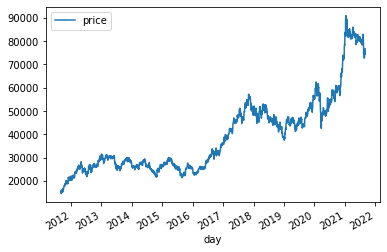

In [7]:
df_copy.plot()
plt.show()

In [8]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

model = ARIMA(df_copy.price.values, order=(3,1,3))
model_fit = model.fit(trend='c', full_output=True, disp=True)
print(model_fit.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                 2460
Model:                 ARIMA(3, 1, 3)   Log Likelihood              -19596.475
Method:                       css-mle   S.D. of innovations            697.217
Date:                Wed, 15 Sep 2021   AIC                          39208.949
Time:                        00:20:28   BIC                          39255.413
Sample:                             1   HQIC                         39225.832
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.8288     13.886      1.788      0.074      -2.388      52.045
ar.L1.D.y      0.4303      0.446      0.964      0.335      -0.445       1.305
ar.L2.D.y      0.1962      0.574      0.342      0.7